In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym

In [9]:
env = gym.make("CartPole-v1")
print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
1


In [11]:
env.reset()

for i in range(100):
   env.render()
   env.step(env.action_space.sample())
env.close()

In [14]:
env.reset()

done = False
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   print(f"{obs} -> {rew}")
   print(f"{info}, {done}")
env.close() 
# Position of cart / Velocity of cart / Angle of pole / Rotation rate of pole

[ 0.03940241 -0.16002429 -0.03670274  0.31885934] -> 1.0
{}, False
[ 0.03620192 -0.3546048  -0.03032555  0.59974533] -> 1.0
{}, False
[ 0.02910983 -0.159072   -0.01833064  0.29766667] -> 1.0
{}, False
[ 0.02592839  0.03630639 -0.01237731 -0.0007406 ] -> 1.0
{}, False
[ 0.02665451  0.23160365 -0.01239212 -0.29730287] -> 1.0
{}, False
[ 0.03128659  0.03666052 -0.01833818 -0.00855383] -> 1.0
{}, False
[ 0.0320198   0.2320406  -0.01850926 -0.3069658 ] -> 1.0
{}, False
[ 0.03666061  0.42742133 -0.02464858 -0.6054281 ] -> 1.0
{}, False
[ 0.04520904  0.23265259 -0.03675714 -0.3206097 ] -> 1.0
{}, False
[ 0.04986209  0.4282782  -0.04316933 -0.62465405] -> 1.0
{}, False
[ 0.05842765  0.6239754  -0.05566241 -0.93061423] -> 1.0
{}, False
[ 0.07090716  0.4296471  -0.0742747  -0.6559295 ] -> 1.0
{}, False
[ 0.0795001   0.6257202  -0.08739328 -0.97104496] -> 1.0
{}, False
[ 0.09201451  0.43187296 -0.10681418 -0.7070447 ] -> 1.0
{}, False
[ 0.10065196  0.62829983 -0.12095508 -1.0313494 ] -> 1.0
{}, F

In [15]:
print(env.observation_space.low)
print(env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [16]:
def discretize(x):
    return tuple((x/np.array([0.25, 0.25, 0.01, 0.1])).astype(np.int))

In [17]:
def create_bins(i,num):
    return np.arange(num+1)*(i[1]-i[0])/num+i[0]

print("Sample bins for interval (-5,5) with 10 bins\n",create_bins((-5,5),10))

ints = [(-5,5),(-2,2),(-0.5,0.5),(-2,2)] # intervals of values for each parameter
nbins = [20,20,10,10] # number of bins for each parameter
bins = [create_bins(ints[i],nbins[i]) for i in range(4)]

def discretize_bins(x):
    return tuple(np.digitize(x[i],bins[i]) for i in range(4))

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [ ]:
env.reset()

done = False
while not done:
#    env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
#    print(discretize_bins(obs))
   print(discretize(obs))
env.close()

In [23]:
Q = {}
actions = (0,1)

def qvalues(state):
    return [Q.get((state,a),0) for a in actions]

In [24]:
# hyperparameters
alpha = 0.3
gamma = 0.9
epsilon = 0.90

In [ ]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

Qmax = 0
cum_rewards = []
rewards = []
for epoch in range(100000):
    obs = env.reset()
    done = False
    cum_reward=0
    # == do the simulation ==
    while not done:
        s = discretize(obs)
        if random.random()<epsilon:
            # exploitation - chose the action according to Q-Table probabilities
            v = probs(np.array(qvalues(s)))
            a = random.choices(actions,weights=v)[0]
        else:
            # exploration - randomly chose the action
            a = np.random.randint(env.action_space.n)

        obs, rew, done, info = env.step(a)
        cum_reward+=rew
        ns = discretize(obs)
        Q[(s,a)] = (1 - alpha) * Q.get((s,a),0) + alpha * (rew + gamma * max(qvalues(ns)))
    cum_rewards.append(cum_reward)
    rewards.append(cum_reward)
    # == Periodically print results and calculate average reward ==
    if epoch%5000==0:
        print(f"{epoch}: {np.average(cum_rewards)}, alpha={alpha}, epsilon={epsilon}")
        if np.average(cum_rewards) > Qmax:
            Qmax = np.average(cum_rewards)
            Qbest = Q
        cum_rewards=[]

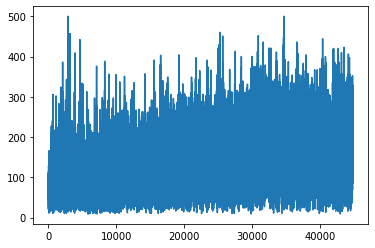

In [29]:
plt.plot(rewards)

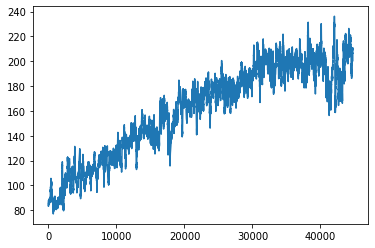

In [27]:
def running_average(x,window):
    return np.convolve(x,np.ones(window)/window,mode='valid')

plt.plot(running_average(rewards,100))

In [ ]:
obs = env.reset()
done = False
while not done:
   s = discretize(obs)
   env.render()
   v = probs(np.array(qvalues(s)))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
env.close()